In [1]:
import os
import sys
import pandas as pd
sys.path.append('../../')
import matplotlib.pyplot as plt

## Data Ingestion Analysys

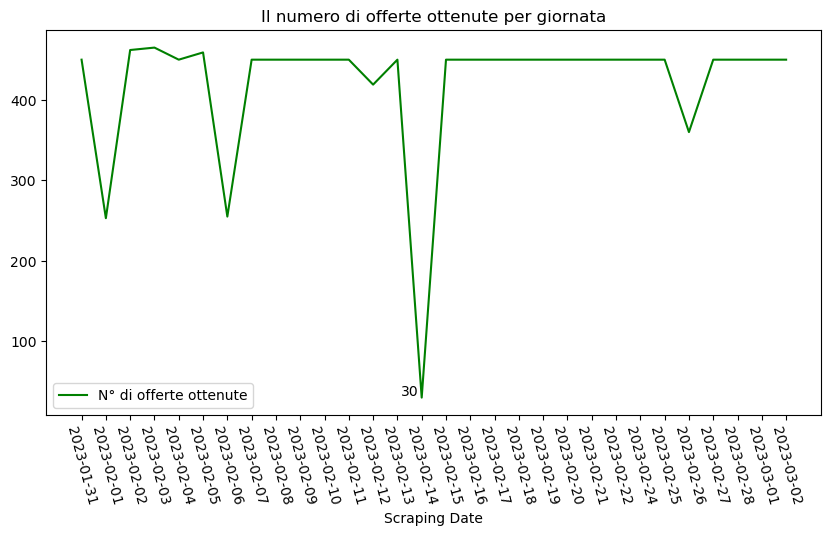

In [2]:
df = pd.read_csv('../data_results/DataIngestion/offerte_x_giornata.csv')
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['scraping_date'], df['total_rows'], label='N° di offerte ottenute', color='green')
ax.text(13.5, df['total_rows'].min() + 2, df['total_rows'].min(), ha='center')
plt.xlabel('Scraping Date')

plt.title('Il numero di offerte ottenute per giornata')
plt.xticks(rotation=-75)
plt.legend()
plt.show()

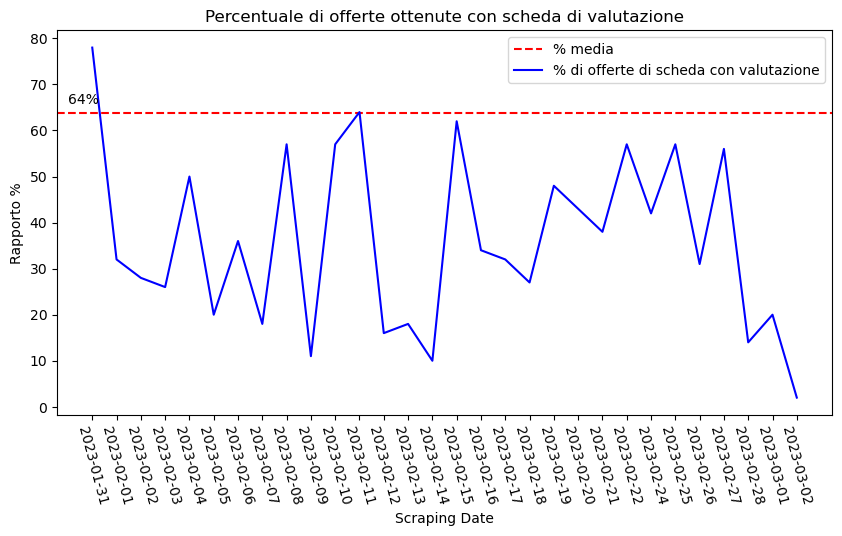

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
df['ratio'] = round(df['ratio']).astype(int)
ax.axhline(y=df['ratio'].mean(), color='red', linestyle='--', label='% media')
ax.plot(df['scraping_date'], 100 - df['ratio'], color='blue', label='% di offerte di scheda con valutazione')
ax.text(-1, df['ratio'].mean() + 2, str(round(df['ratio'].mean())) + '%', ha='left')
plt.xlabel('Scraping Date')
plt.xticks(rotation=-75)
plt.ylabel('Rapporto %')
plt.title('Percentuale di offerte ottenute con scheda di valutazione')


plt.legend()
plt.show()

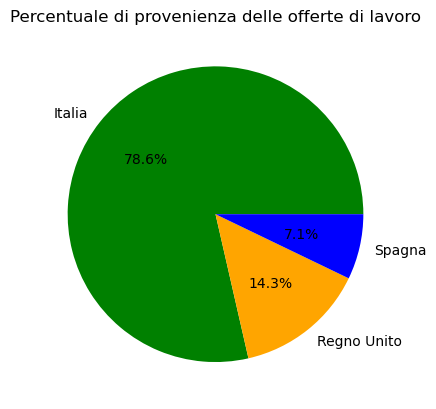

In [4]:
df_st = pd.read_csv('../data_results/DataIngestion/offerte_x_stato.csv')
ax.pie(df_st['job_link'], labels=df_st['stato'])
colors = {'Italia': 'green', 'Francia': 'green', 'Spagna': 'blue', 'Regno Unito': 'orange'}
plt.pie(df_st['job_link'], labels=df_st['stato'], colors=[colors[i] for i in df_st['stato']], autopct='%1.1f%%' )
plt.title('Percentuale di provenienza delle offerte di lavoro')
plt.show()

## Data quality run

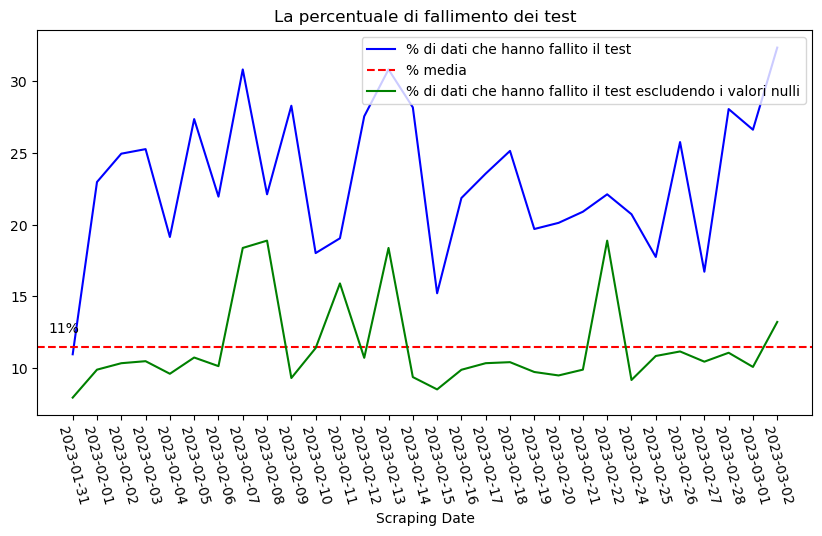

In [5]:
df_q = pd.read_csv('../data_results/DataQuality/test_falliti.csv')
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_q['scraping_date'], df_q['unexpected_percent'], label='% di dati che hanno fallito il test', color='blue')

#ax.plot(df_q['scraping_date'], df_q['unexpected_percent_nonmissing']-df_q['unexpected_count'], label='N° di dati che hanno passato il controllo', color='green')
ax.axhline(y=df_q['unexpected_percent_nonmissing'].mean(), color='red', linestyle='--', label='% media')

ax.plot(df_q['scraping_date'], df_q['unexpected_percent_nonmissing'], label='% di dati che hanno fallito il test escludendo i valori nulli', color='green')
ax.text(-1, df_q['unexpected_percent_nonmissing'].mean() + 1, str(round(df_q['unexpected_percent_nonmissing'].mean())) + '%', ha='left')

#ax.text(13.5, df['total_rows'].min() + 2, df['total_rows'].min(), ha='center')
#ax.plot(df['scraping_date'], df['ko_schedevalutazione'],  label='Offerte ottenute senza scheda di valutazione', color='red')
plt.xlabel('Scraping Date')

plt.title('La percentuale di fallimento dei test')
plt.xticks(rotation=-75)
plt.legend()
plt.show()

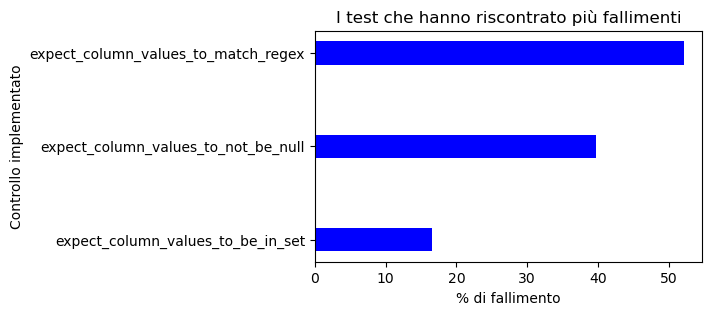

In [6]:
fig, ax = plt.subplots(figsize=(5, 3))

df_q = pd.read_csv('../data_results/DataQuality/test_peggiori.csv')
ax.barh(df_q['expectation_type'], df_q['unexpected_percent'], label='% di fallimento del singolo test', color='blue', height=0.25)
plt.ylabel('Controllo implementato')
plt.xlabel('% di fallimento')
plt.title('I test che hanno riscontrato più fallimenti')
plt.show()

df_q.to_csv('../data_results/DataQuality/test_peggiori.csv', index=False)